<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 2</b></h3>
<h4><b>Honey production dataset</b></h4>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/honey.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This dataset contains a sample of honey production in USA from various different states, from years 1995 to 2021. There are many interesting variables in the dataset, including production (colonies number * yield per colony), value of production (production * average price), amount of stocks owned by the producer, average price, colony number and yield per colony.</p>
<p>This notebook uses heavily the quantile -feature in the query-function in pandas. This allows us to inspect to the top 25% honey companies in the set based on production, as well se companies in the 25-50%, 50-75% quantiles as well as lowest 25% companies.See code comments for more details what has been done with the dataset.</p>
<p>Kaggle page: <a href="https://www.kaggle.com/datasets/mohitpoudel/us-honey-production-19952021">https://www.kaggle.com/datasets/mohitpoudel/us-honey-production-19952021</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>Can you find any states that have got more successful in terms of different variables in this dataset?</li>
<li>Something has happened to honey production overall during the years. Which variables show this best? Can you find anything with Google why this phenomenon might have a happened?</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too). Note: there are many not-so-useful plots in this notebook.</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>
<li>How does the hue change the perspective of the data in the regression plots?</li>

<b>Extra questions/tasks for extra points:</b>
<li>If you find new insight or features in this dataset by using some other plots and/or pandas tricks, you can do so. In that case, please create a new section for the needed code cells you created accompanied with either code comments or markdown.  </li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>
<li>This notebook mostly concentrates on the most productive honey producers. You can also inspect different quantiles (df2, df3, df4). Are there any differences when compared to the top DataFrame?</li>


<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Load the dataset and clean up data</b></h4>

In [2]:
# load the dataset and remove first column (duplicate index)
df = pd.read_csv("US_honey_dataset.csv")
del df[df.columns[0]]

# let's see how many different states we have here (44 in total)
states = df['state'].value_counts()
print(states)

print("\nAmount of different states:")
print(len(states))

# create a helper DataFrame and group by state and production
values = df.groupby('state').sum().sort_values(by=['production'], ascending=False)

# get lists of states by production, one for each 25% quantile
df_highest = list(values.query('production >= production.quantile(q=0.75)').index)
df_average_plus = list(values.query('production >= production.quantile(q=0.50) and production < production.quantile(q=0.75)').index)
df_average_minus = list(values.query('production >= production.quantile(q=0.25) and production < production.quantile(q=0.50)').index)
df_lowest = list(values.query('production < production.quantile(q=0.25)').index)

# filter the corresponding states into their DataFrames
df1 = df[df['state'].isin(df_highest)]
df2 = df[df['state'].isin(df_average_plus)]
df3 = df[df['state'].isin(df_average_minus)]
df4 = df[df['state'].isin(df_lowest)]

# let's save the correlation matrices too
correlations = df.corr(numeric_only=True)
correlations1 = df1.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)
correlations3 = df3.corr(numeric_only=True)
correlations4 = df4.corr(numeric_only=True)

# the data is otherwise fairly clean

Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

Amount of different states:
44


<h4><b>seaborn plotting - pair plots</b></h4>

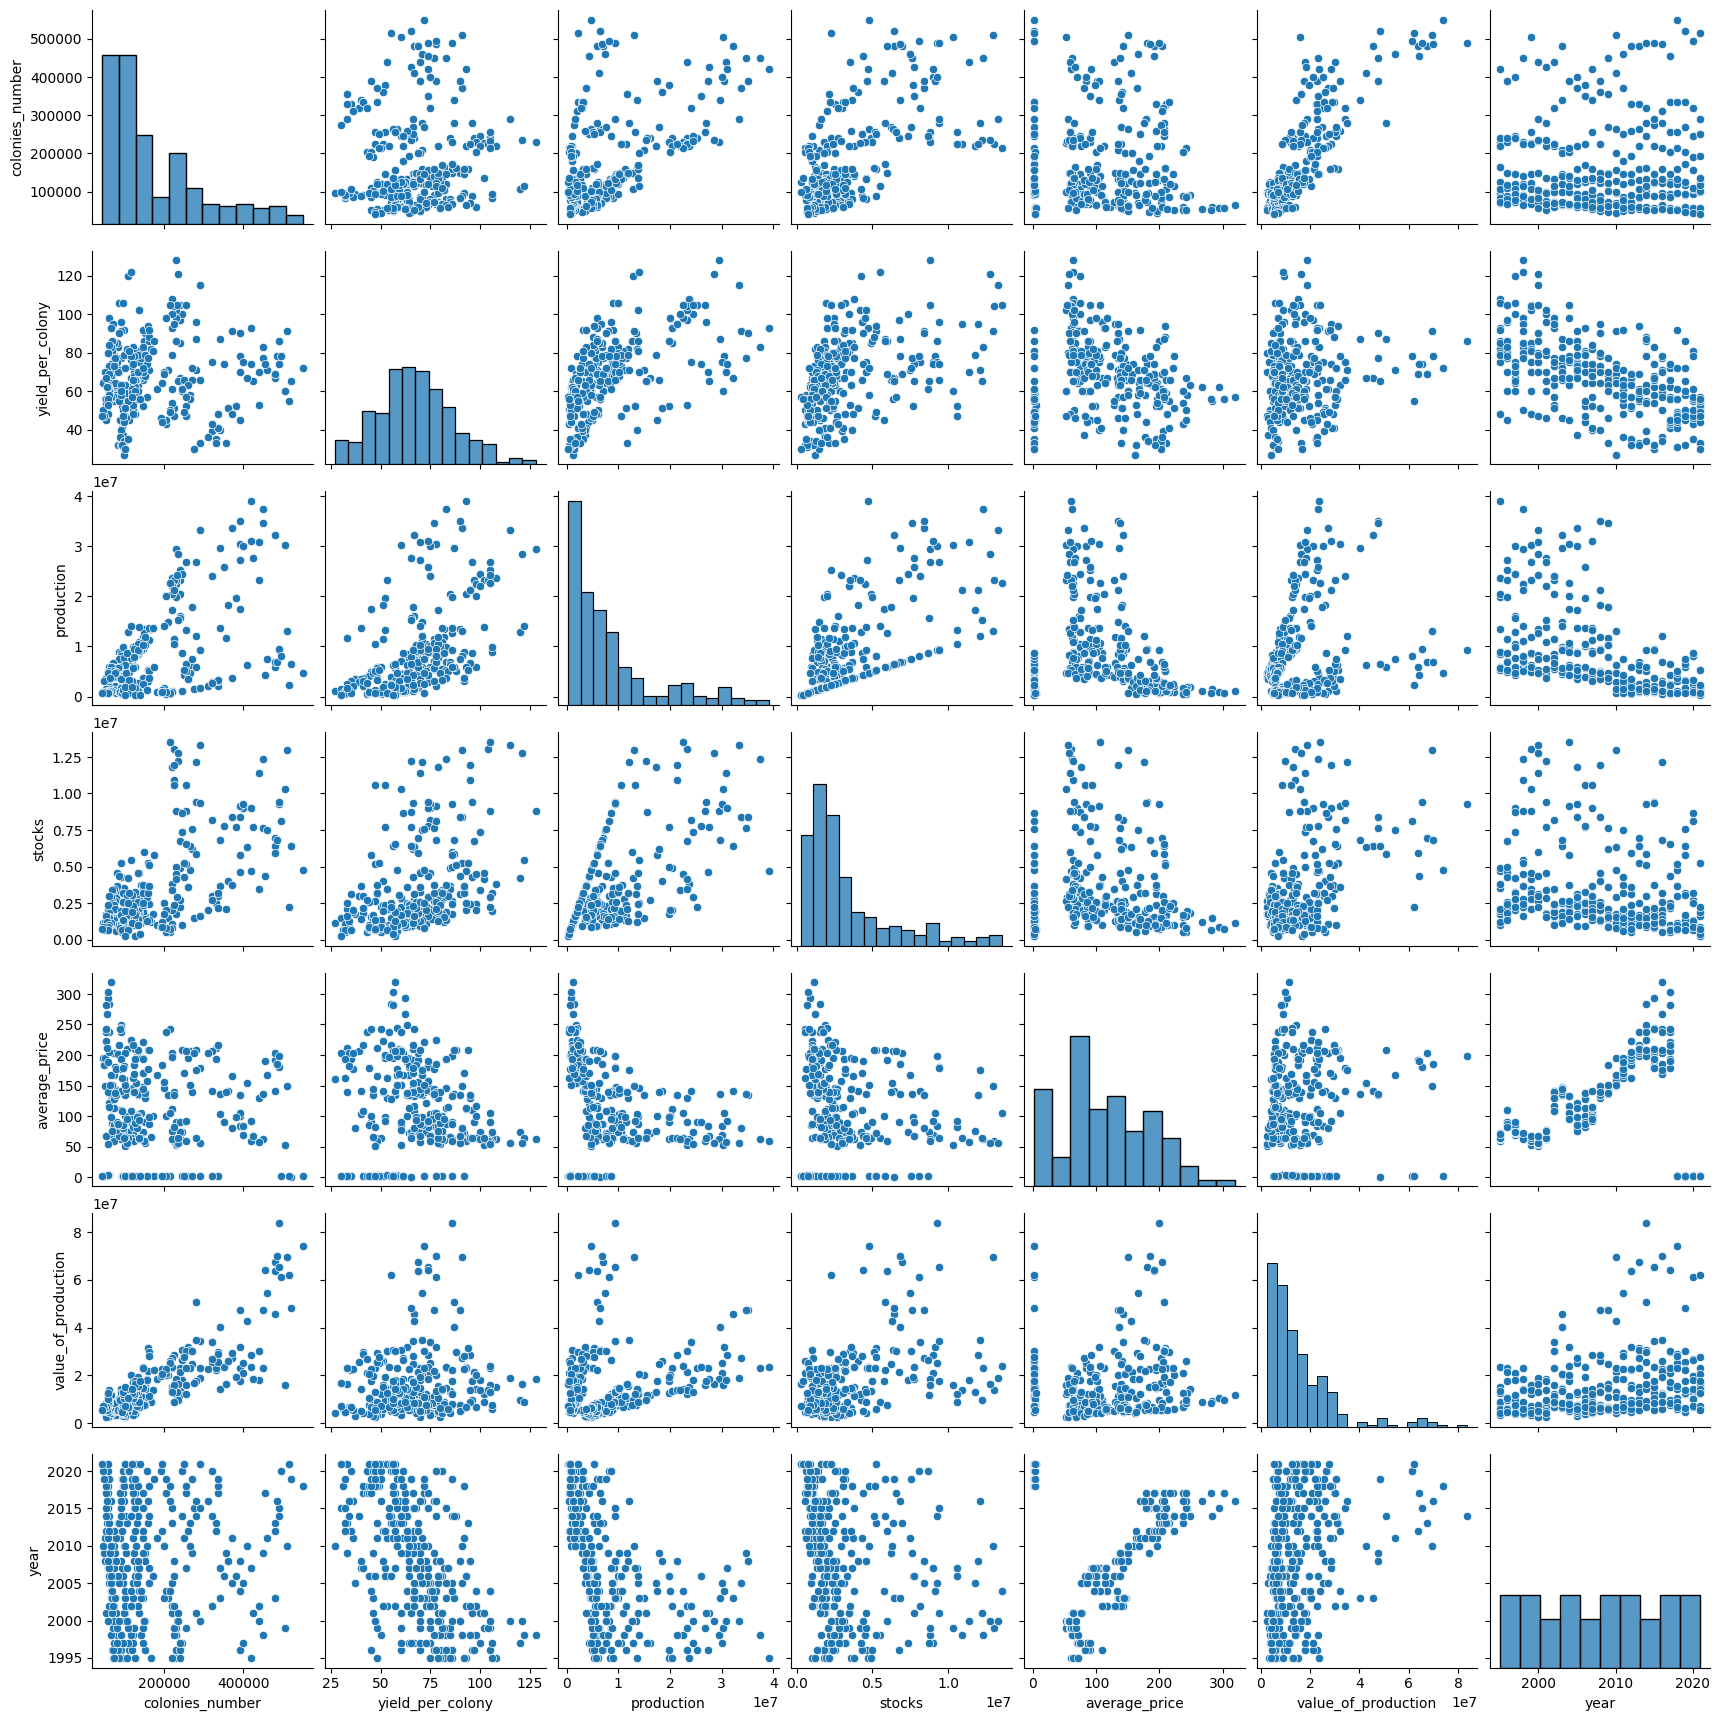

In [ ]:
# basic pair plot
sns.pairplot(df1)

# It is evident that there is a correlation between the year and the average price,
# as the average price has consistently increased over time. This appears to be 
# the only significant correlation present.

data looks non-understandable

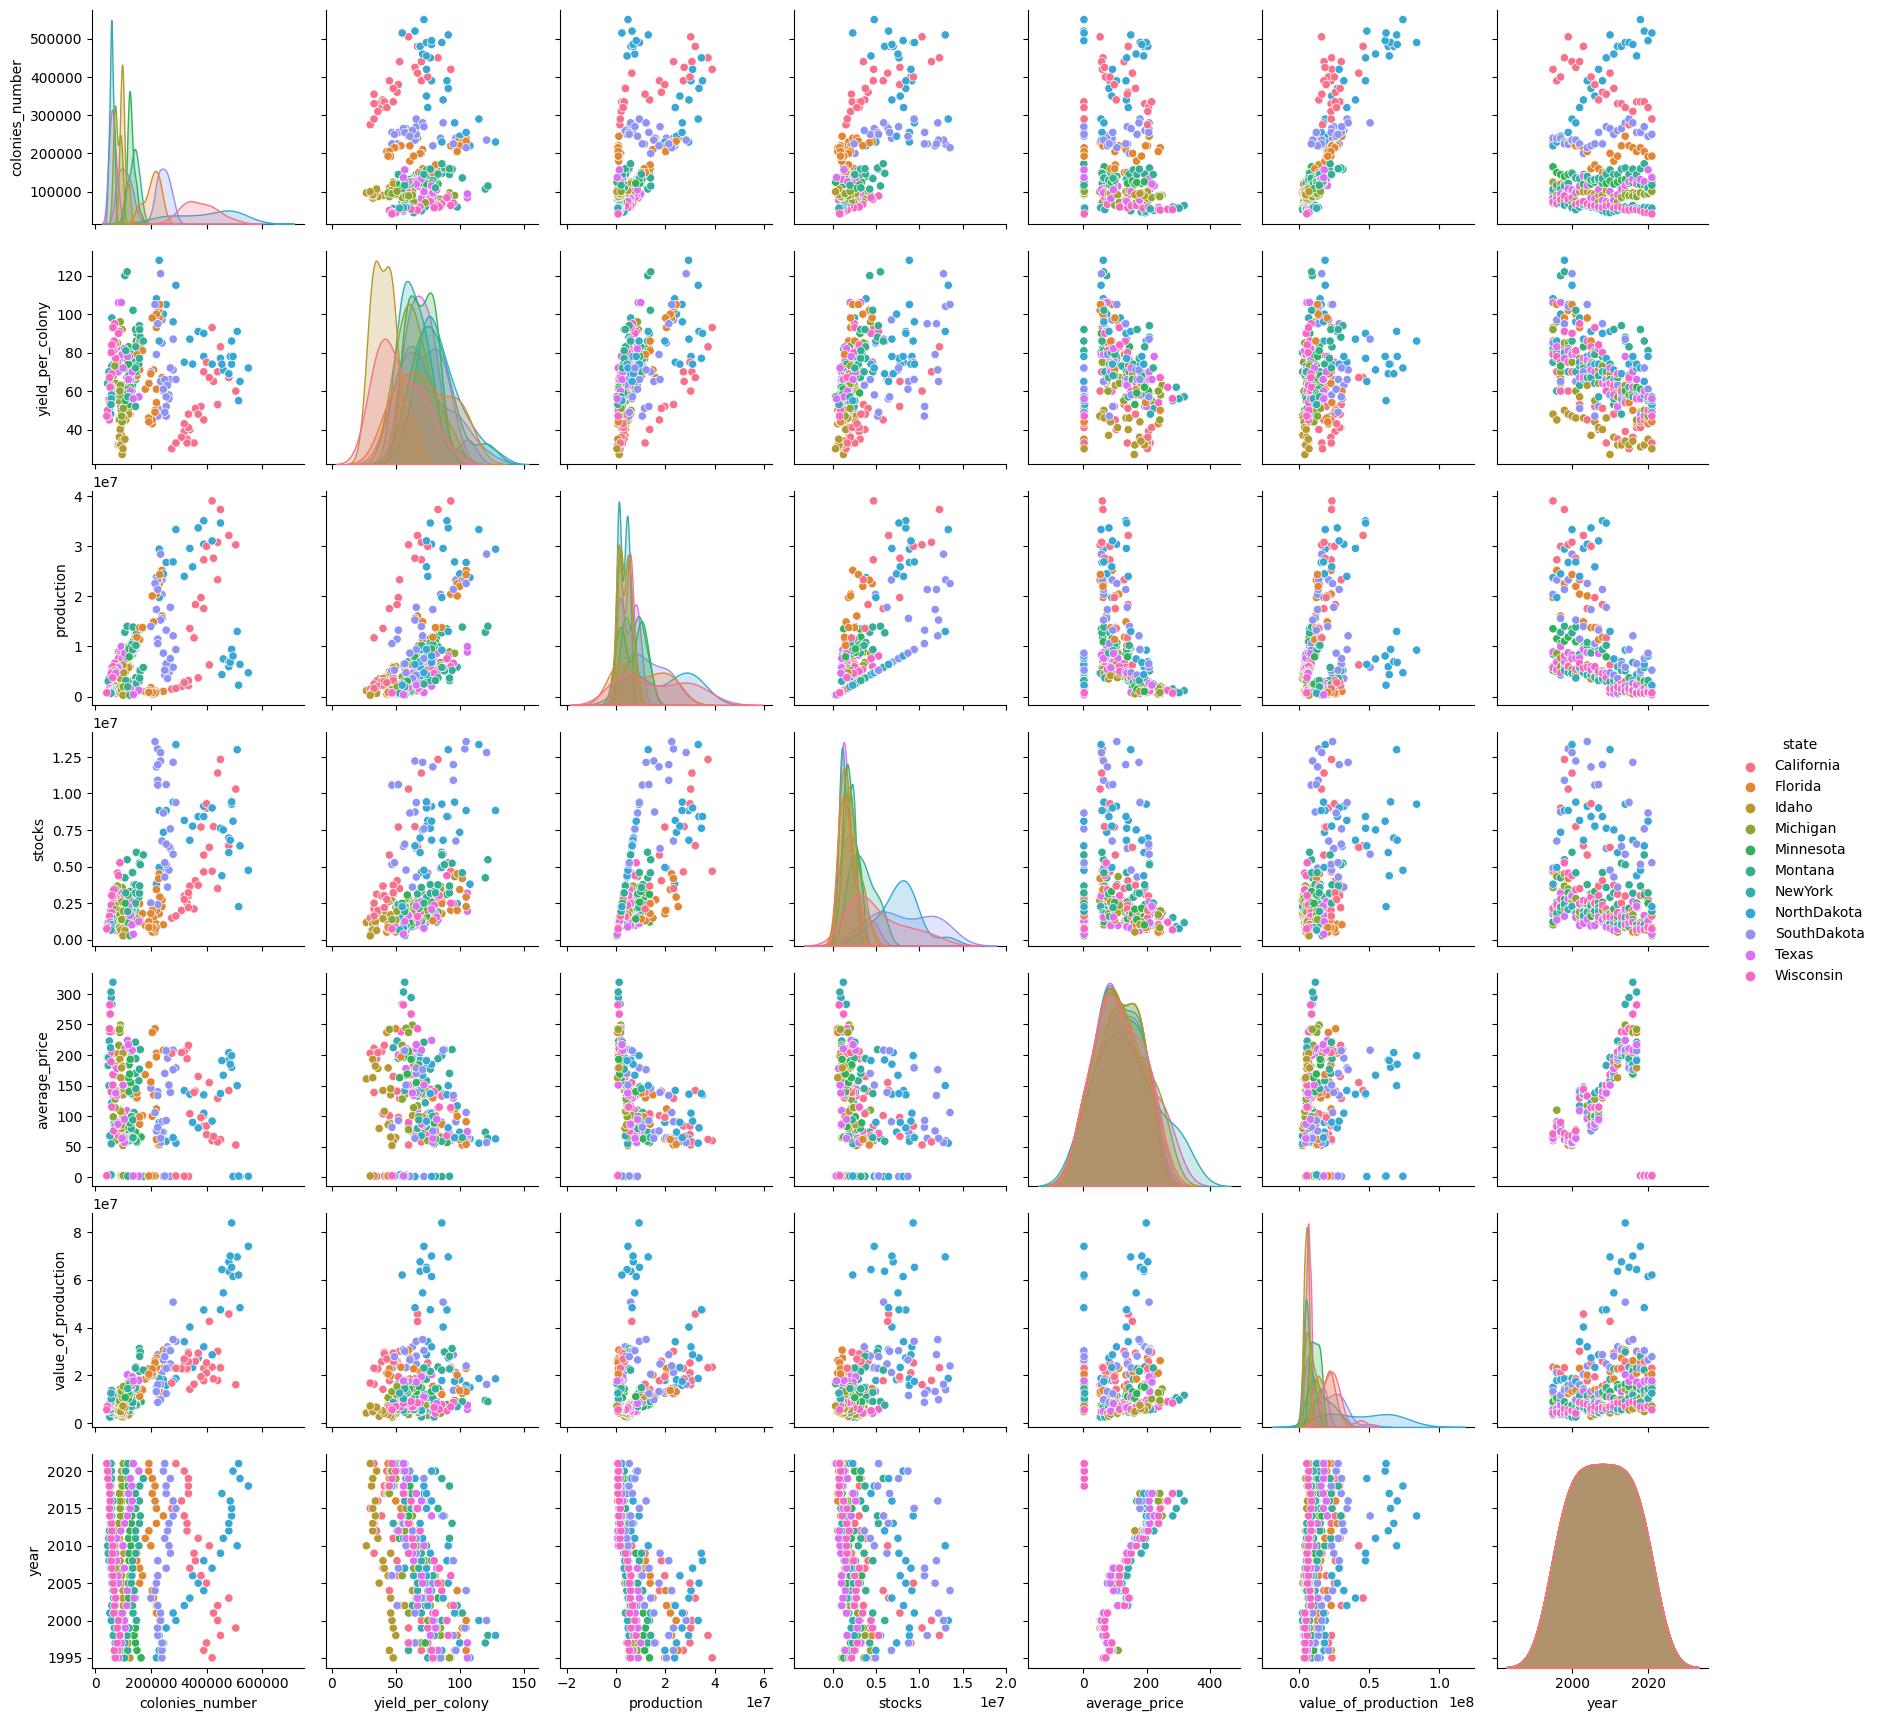

In [4]:
# pair plot, hue on state
sns.pairplot(df1, hue="state")

# A correlation can be observed between the number of colonies and the value of production.

colors separate data good, I see leaders of each graph
colonies_number - Montana
yield_per_colony - North Dakota
production - California
stocks - South Dakota
average_price - Montana
value_of_production - North Dakota

<h4><b>seaborn plotting - regression plots</b></h4>

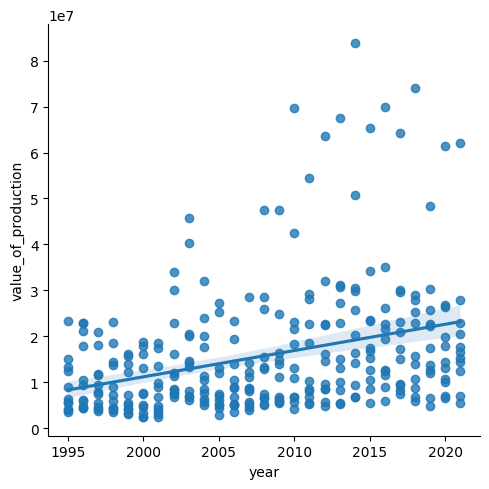

In [5]:
# regression plot for value of production and year
sns.lmplot(x='year', y='value_of_production', data=df1)

# A pattern of growth in production over time can be observed, but production declined after 2015.

without color marking it is imposible to understand what is what

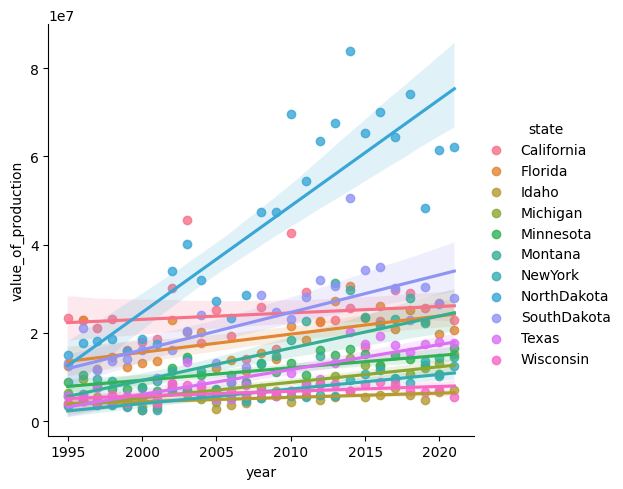

In [6]:
# regression plot for value of production and year, hue on state
sns.lmplot(x='year', y='value_of_production', data=df1, hue='state')

# The value of production in North Dakota has seen more success.

with color marking we can see the dynamic of growth for every state

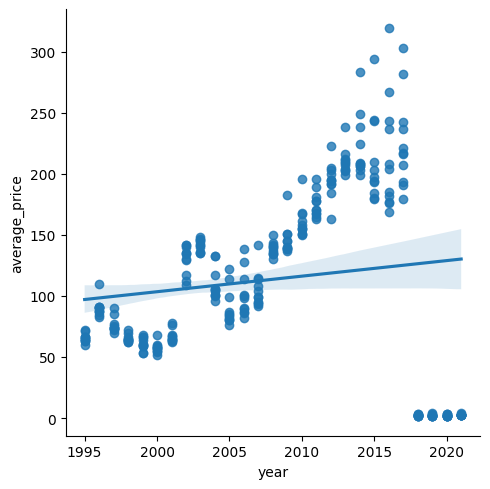

In [7]:
# regression plot for value of average price and year
sns.lmplot(x='year', y='average_price', data=df1)

#The price declined after the loss of Honey Bee colonies.

average price grows every year, i think due to inflation
exeption is only 1995 - 2000 period

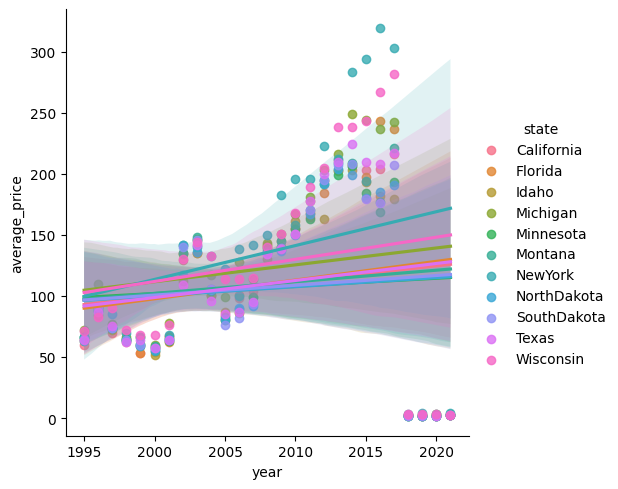

In [8]:
# regression plot for value of average price and year, hue on state
sns.lmplot(x='year', y='average_price', data=df1, hue='state')

# The data shows that New York has a higher price than North Dakota. Nonetheless, 
# all variables must be considered to determine the most successful state.

with color marking we can see that prices in New York showed the fastest growth
Texas, North Dakota and Florida are states from "exeption" period 1995-2000 , the average price of this period can decreased because of local field support by goverment or good climate condition and and high level of honey maturation and amount of offer of these year can be the reason of low price 

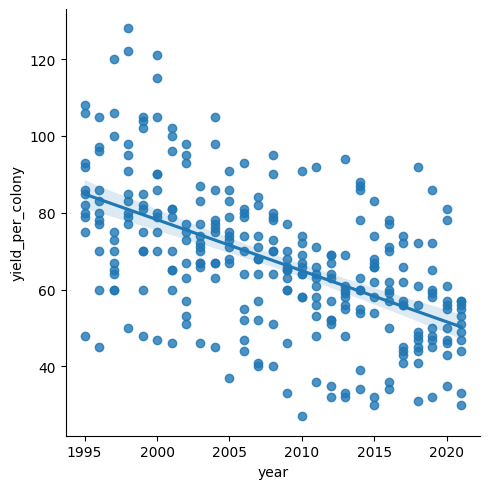

In [9]:
# regression plot for yield per colony and year
sns.lmplot(x='year', y='yield_per_colony', data=df1)

# What makes this plot interesting is that it demonstrates 
# a decrease in yield not only after 2015 but also before that time.

I see downtrend of yield for all period, it can be a reason of prices increasing

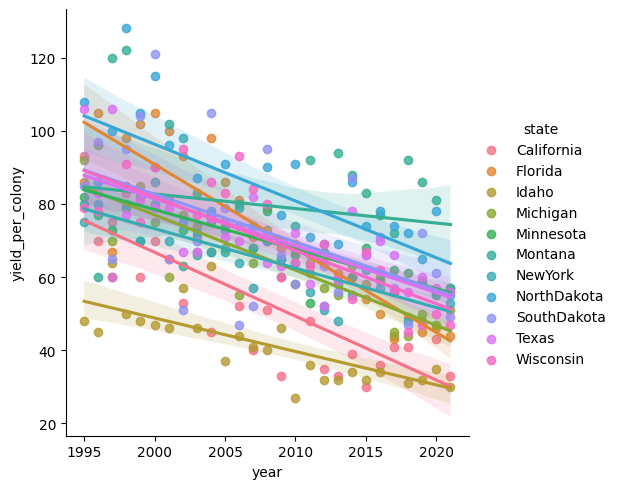

In [10]:
# regression plot for yield per colony and year, hue on state
sns.lmplot(x='year', y='yield_per_colony', data=df1, hue='state')

#T he seemingly random distribution of points and lack of a clear 
# trend or correlation make it challenging to draw any firm conclusions from this data.

the level of decreasing of yield in every state almost same, but Florida and Wisconsin have the worst index
the best index has Minnesota

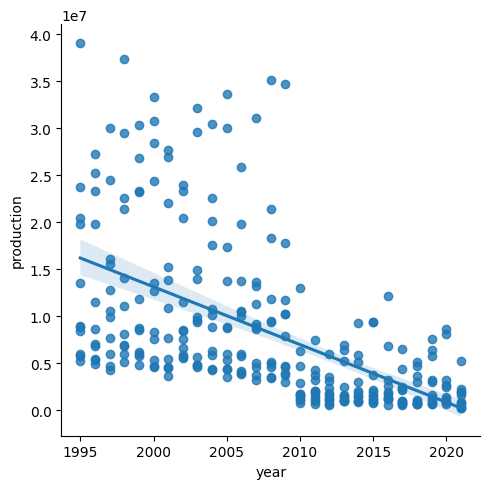

In [11]:
# regression plot for production and year
sns.lmplot(x='year', y='production', data=df1)

# with colors it is possible to see some correlations

in general view amount of production decrease

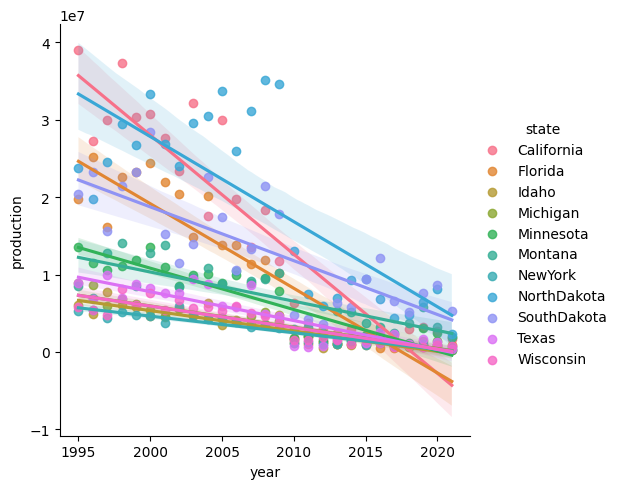

In [12]:
# regression plot for production and year, hue on state
sns.lmplot(x='year', y='production', data=df1, hue='state')

# The plot demonstrates that North Dakota and California were previously successful, 
# but South Dakota became the leader in production after 2010.

according this graph the Honey production of USA will die soon,
I think it is not absolutely true but shows down trend of field

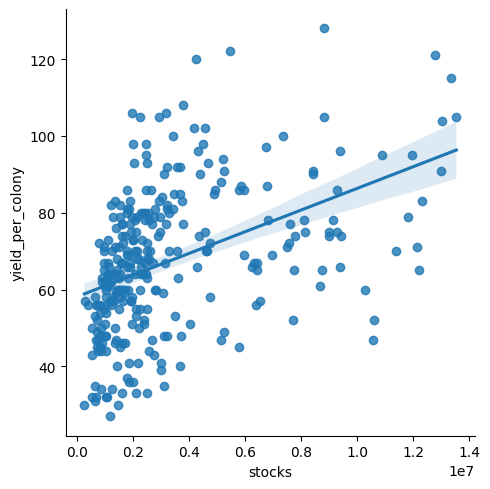

In [ ]:
# regression plot for yield per colony and stockse
sns.lmplot(x='stocks', y='yield_per_colony', data=df1)

# I find this plot to be somewhat confusing

the graph shows the mains rules of economics, when amount of goods decrease - price (also, for stocks of limited production companies) increase

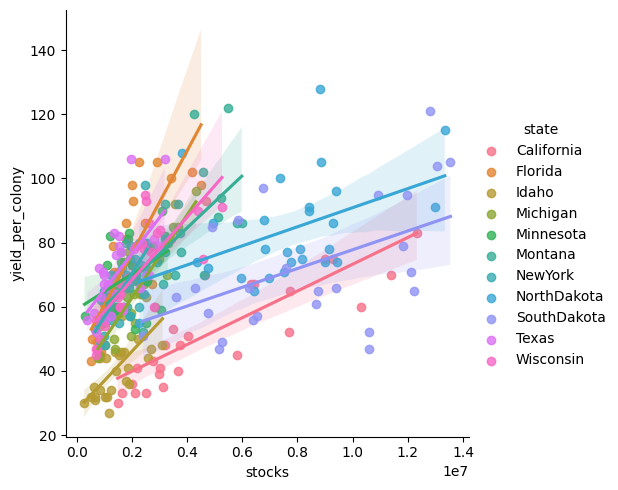

In [14]:
# regression plot for yield per colony and stocks, hue on state
sns.lmplot(x='stocks', y='yield_per_colony', data=df1, hue='state')


# The plot shows that North and South Dakota have the most favorable statistics.

any state shows uptrend in stocks

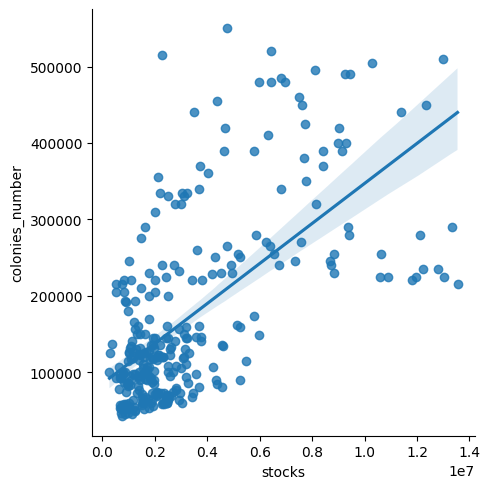

In [15]:
# regression plot for colonies number and stocks
sns.lmplot(x='stocks', y='colonies_number', data=df1)

# The plot demonstrating the correlation between colonies and stocks may not be particularly informative, 
# as the relationship between the two variables is already commonly known.



uptrend

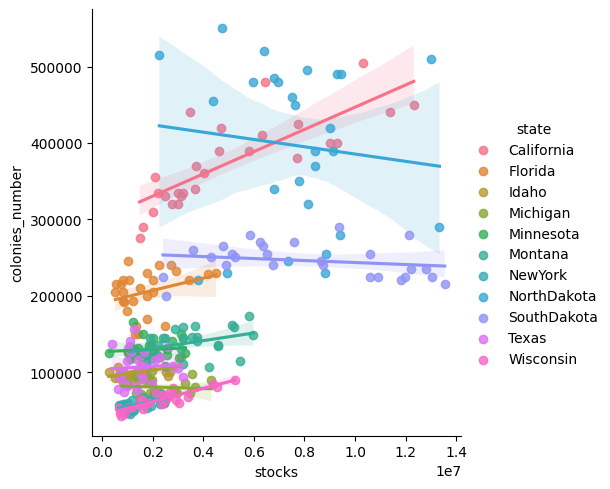

In [16]:
# regression plot for colonies number and stocks, hue on state
sns.lmplot(x='stocks', y='colonies_number', data=df1, hue='state')

# Based on the data, North Dakota, California, and South Dakota are the three leading states.

California , North Dakota and Souh dakota dominate

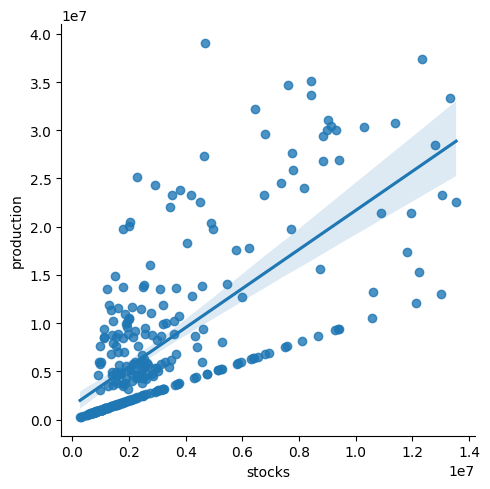

In [17]:
# regression plot for production and stocks
sns.lmplot(x='stocks', y='production', data=df1)

# The plot that shows the correlation between production and stocks may not be particularly informative, 
# as the relationship between the two variables is already widely understood.

production and stocks interconnected in uptrend

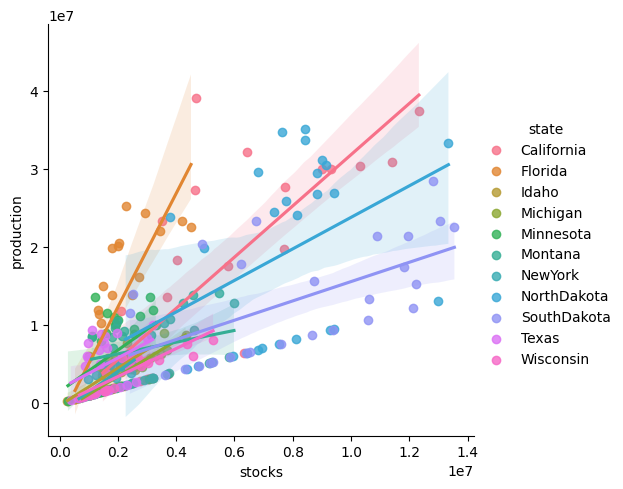

In [18]:
# regression plot for production and stocks, hue on state
sns.lmplot(x='stocks', y='production', data=df1, hue='state')

# This plot provides valuable information, and in addition to showing that North Dakota 
# and California have been successful throughout the entire period, 
# it also highlights that Florida had a period of success in the beginning.

most of states have familiar values in (0-1,5; 0.0-0.6), but California, South dakota, North dakota show bigger results

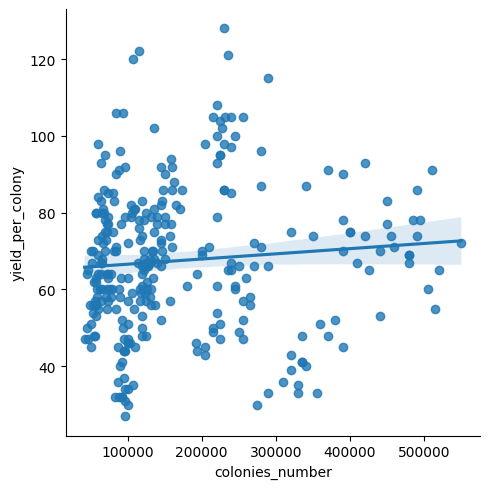

In [19]:
# regression plot for yield per colony and colonies number
sns.lmplot(x='colonies_number', y='yield_per_colony', data=df1)

# As there does not appear to be any discernible correlation in this plot, 
# it may not be particularly useful and could be removed.

the bigger amount of points in 100000 colonies_number

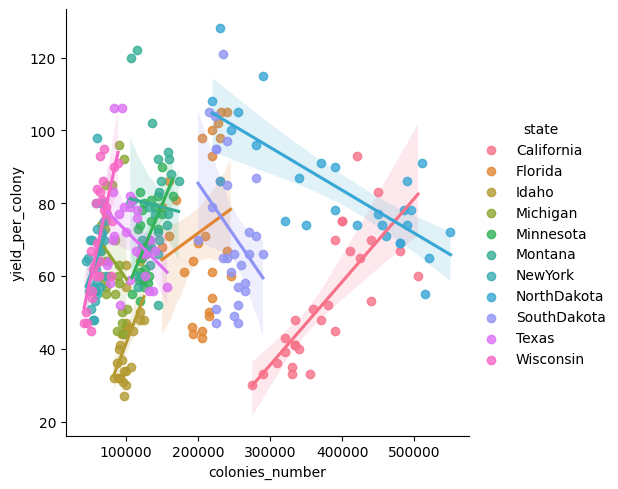

In [ ]:
# regression plot for yield per colony and colonies number, hue on state
sns.lmplot(x='colonies_number', y='yield_per_colony', data=df1, hue='state')

# By comparing North Dakota and California in this plot, we can see that while both are successful, 
# North Dakota has higher values despite having a lower total number of colonies.

it shows that yield per colony not corelated with colonies_number

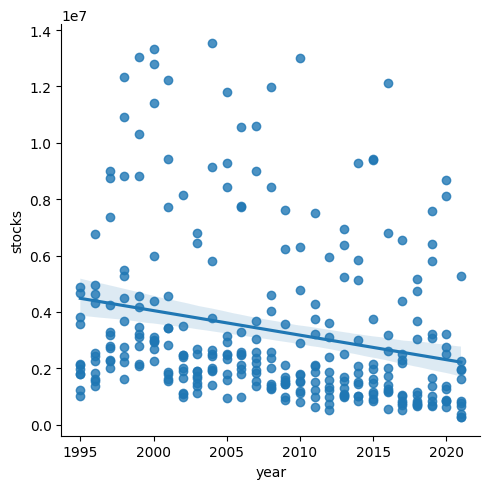

In [21]:
# regression plot for stocks and year
sns.lmplot(x='year', y='stocks', data=df1)

# same data

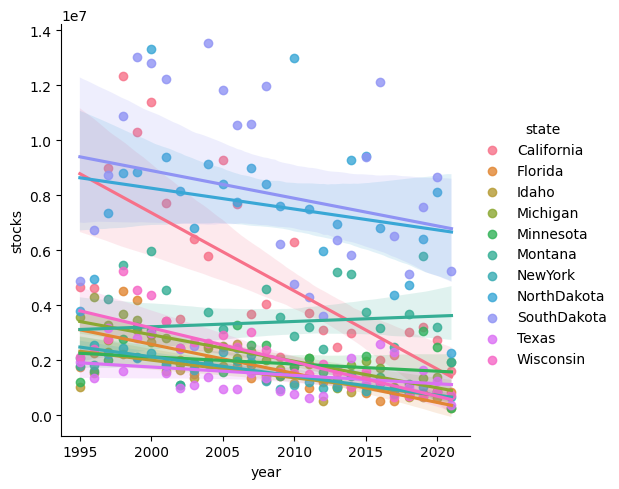

In [22]:
# regression plot for stocks and year, hue on state
sns.lmplot(x='year', y='stocks', data=df1, hue='state')

# same data

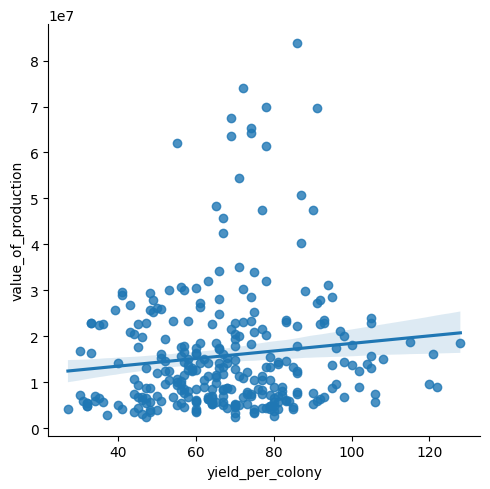

In [23]:
# regression plot for value of production and yield per colony
sns.lmplot(x='yield_per_colony', y='value_of_production', data=df1)

# This plot offers an intriguing insight into the relationship between yield and value of production, highlighting 
# how the former continued to increase while the latter experienced a sudden and significant drop

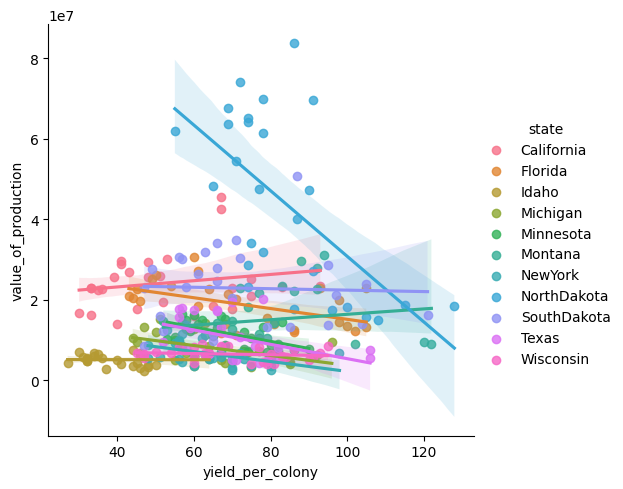

In [24]:
# regression plot for value of production and yield per colony, hue on state
sns.lmplot(x='yield_per_colony', y='value_of_production', data=df1, hue='state')

# same data

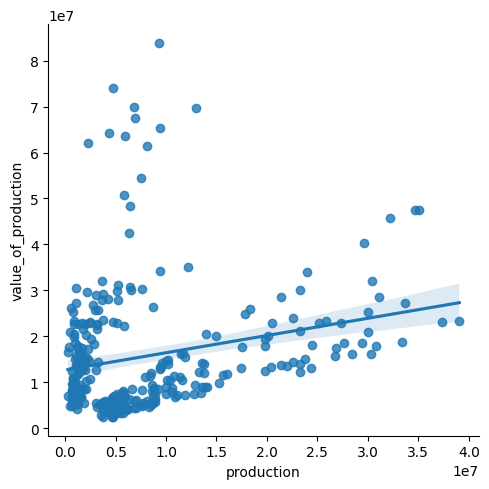

In [25]:
# regression plot for value of production and production
sns.lmplot(x='production', y='value_of_production', data=df1)

# same data

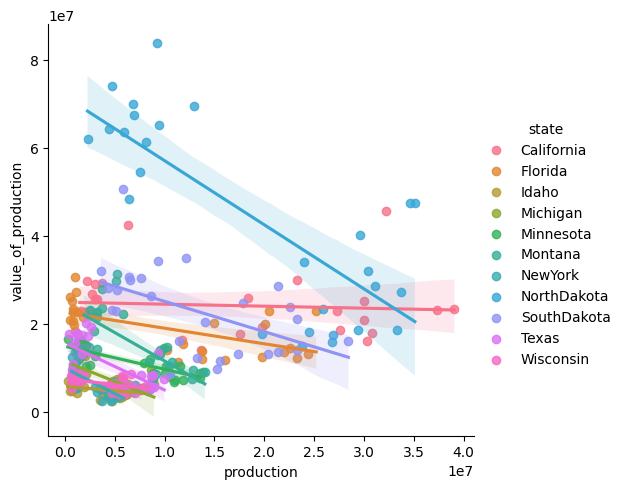

In [26]:
# regression plot for value of production and production, hue on state
sns.lmplot(x='production', y='value_of_production', data=df1, hue='state')

# same data

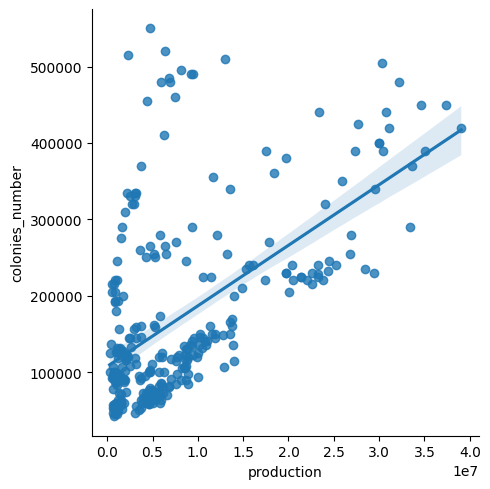

In [27]:
# regression plot for colonies number and production
sns.lmplot(x='production', y='colonies_number', data=df1)

# This plot is not particularly informative as it simply confirms 
# the obvious correlation between colony numbers and production.

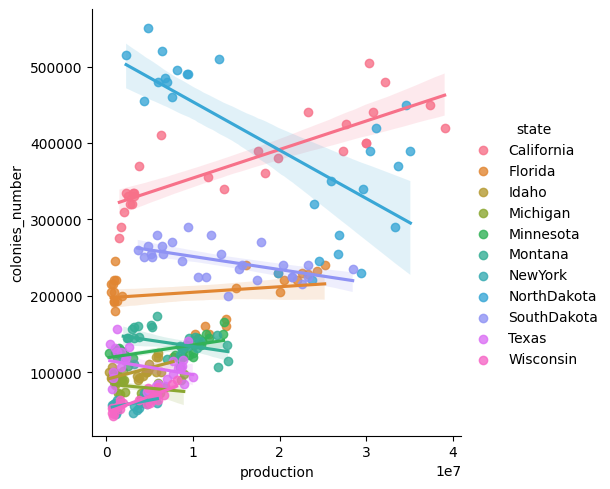

In [28]:
# regression plot for colonies number and production, hue on state
sns.lmplot(x='production', y='colonies_number', data=df1, hue='state')

# useful plot, the same data as before

<h4><b>seaborn plotting - box plots</b></h4>

<AxesSubplot: xlabel='state', ylabel='production'>

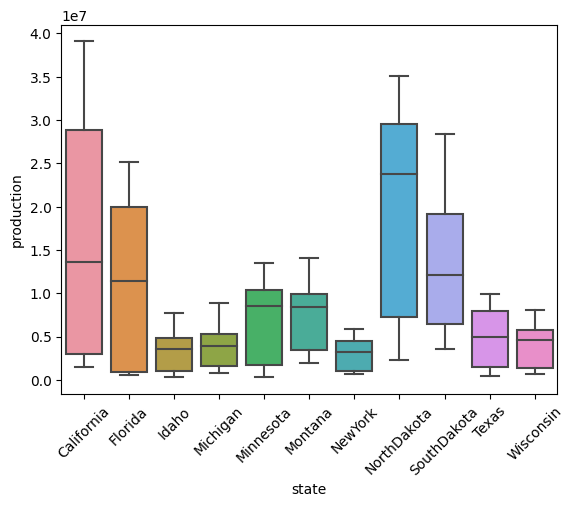

In [29]:
# box plot on state and production, tilt x-labels a little so we can see them better
plt.xticks(rotation=45)
sns.boxplot(x='state', y='production', data=df1)

# The data presented in this plot is particularly 
# helpful as it identifies four states that are clearly ahead of the others in terms of production.

In [30]:
# just out of curiosity... can be see something if we use decades instead of years 
# for boxplot (too many different years for a boxplot otherwise)
df_four_big = df[df['state'].isin(['California', 'Florida', 'NorthDakota', 'SouthDakota'])].copy()

def create_year_spans(row):
    year = int(row['year'])
    
    if year < 2000:
        return 1990
    elif 2000 <= year <= 2010:
        return 2000
    else:
        return 2010

# create new column for decade and drop original year
df_four_big['decade'] = df_four_big.apply(create_year_spans, axis=1)
df_four_big = df_four_big.drop('year', axis=1)

<AxesSubplot: xlabel='decade', ylabel='production'>

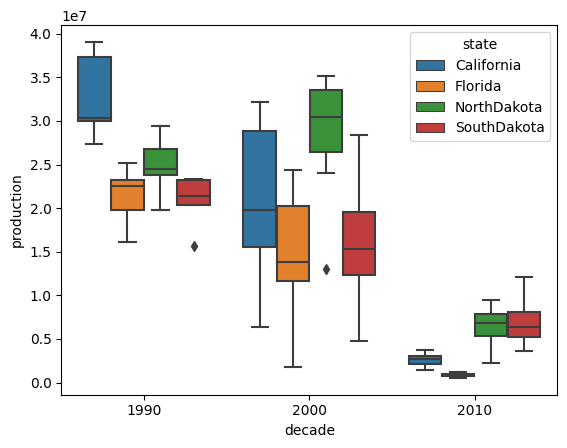

In [31]:
# box plot on decade andp production, hue on state
sns.boxplot(x='decade', y='production', data=df_four_big, hue='state')

# This plot effectively conveys the changing dynamics of honey production over time, 
# showcasing the dominance of California in the past, the rise of North Dakota, and 
# the more recent success of South Dakota, while also indicating an overall decline in production.

<AxesSubplot: xlabel='decade', ylabel='stocks'>

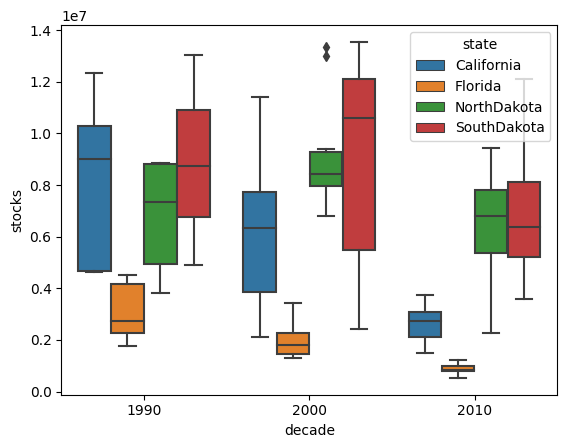

In [32]:
# box plot on decade andp stocks, hue on state
sns.boxplot(x='decade', y='stocks', data=df_four_big, hue='state')

# This plot reveals an unexpected finding - 
# that South Dakota was consistently a leader in honey stocks across all three decades.

<AxesSubplot: xlabel='decade', ylabel='value_of_production'>

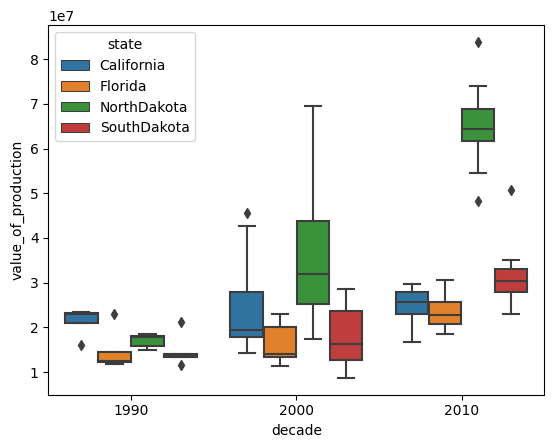

In [33]:
# box plot on decade and value of production, hue on state
sns.boxplot(x='decade', y='value_of_production', data=df_four_big, hue='state')

# same data

<AxesSubplot: xlabel='decade', ylabel='yield_per_colony'>

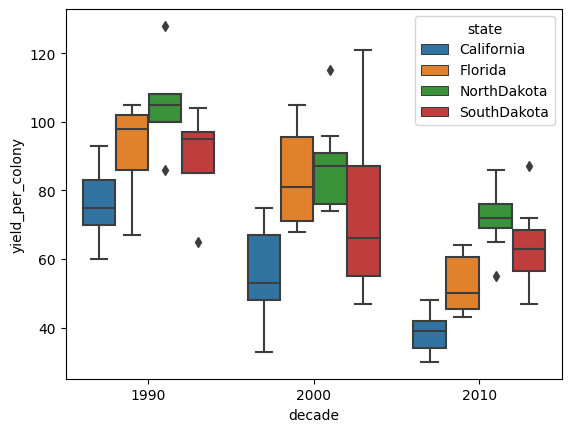

In [34]:
# box plot on decade and yield per colony, hue on state
sns.boxplot(x='decade', y='yield_per_colony', data=df_four_big, hue='state')

#T his plot highlights an interesting trend - that while Florida was not particularly successful in earlier decades, it emerged as a leader in yield_per_colony in the 00s. This suggests that we need to carefully consider which variables are most important when evaluating success in the honey industry.


<AxesSubplot: xlabel='decade', ylabel='average_price'>

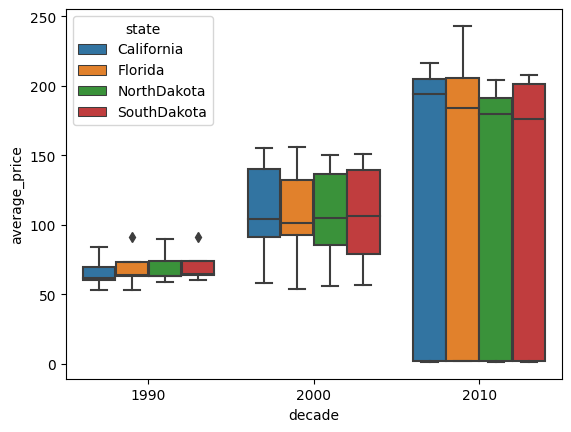

In [35]:
# box plot on decade and average price, hue on state
sns.boxplot(x='decade', y='average_price', data=df_four_big, hue='state')

<AxesSubplot: xlabel='decade', ylabel='colonies_number'>

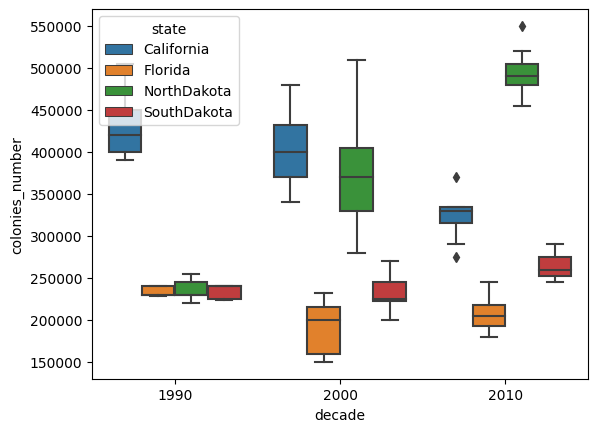

In [36]:
# box plot on decade and colonies number, hue on state
sns.boxplot(x='decade', y='colonies_number', data=df_four_big, hue='state')

# Florida was the most successful state in terms of average price twice during the time period analyzed

<h4><b>seaborn plotting - heatmaps</b></h4>

<AxesSubplot: >

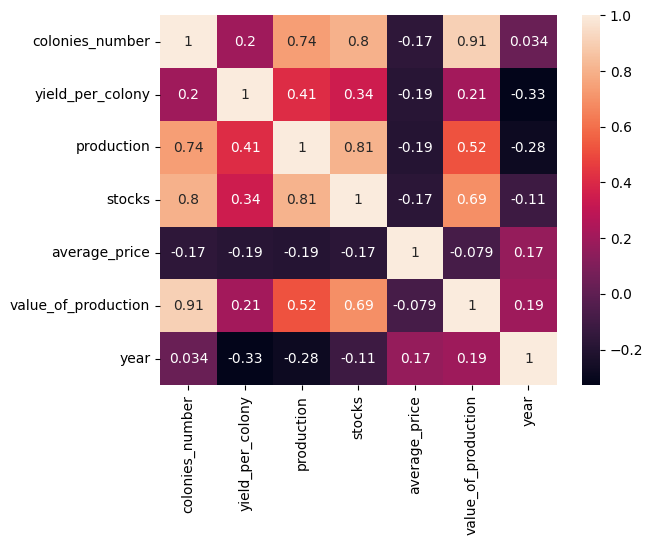

In [37]:
# heatmap for correlations for all data
sns.heatmap(correlations, annot=True)

# we see the correlation but we do not see which state is it

<AxesSubplot: >

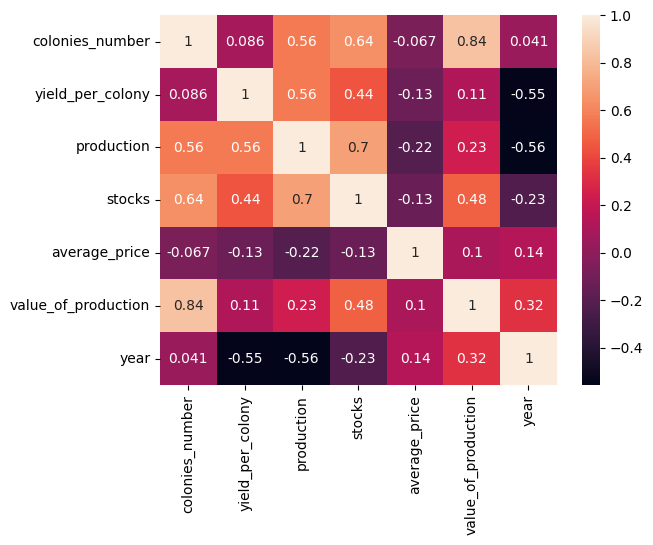

In [38]:
# heatmap for correlations for top 25% producers
sns.heatmap(correlations1, annot=True)

# we see the correlation but we do not see which state is it